# Dynamic Programming and Structural Econometrics #3

### Stochastic DP, 1-d Numerical Integration, Deaton's model

**Readings:** 
- 📖 Judd, K. L. (1998). Numerical methods in economics. MIT press. Sections 7.1-7.5, 8.2
- 📖 Angus Deaton: "Saving and Liquidity constraints" *Econometrica* 59.5 (1991): 1221-1248. ([link to paper](https://www.princeton.edu/~deaton/downloads/Saving_and_Liquidity_Constraints.pdf))
- 📖 Jerome Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” Sections 3.2 and section 6.3.5.

by Bertel Schjerning

University of Copenhagen


### This lecture
1. Stochastic DP and choice under uncertainty $\rightarrow$ need to solve integrals
1. Numerical Integration: Quadrature methods and Monte Carlo (in 1d)
1. Example: Consumption with stochastic income and liquidity constraints (Deaton's model)


### The Bellman Equation for the general MDP framework
- The bellman equation for the **infinite horizon**, $T = \infty$ 
$$
V(s)=  \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$ 
- The bellman equation for the **finite horizon**, $T < \infty$ 
$$
V_t(s_t)= \max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)  \big]
$$
- So far we have only considered the cases of ether deterministic state transition or cases with shocks that has a finite number of support points.  
- When agents make choices under uncertainty about future states $p(s_{t+1}|s_t, d_t)$ is not degenerate. 
- If the stochastic shocks to have continuous support, the integral does not turn in to a sum. 
- **Need to solve the integral** to obtain the expected future value conditional current states and choices

### The integral
$$
E[V_{t+1}(s_{t+1})|s_t, d_t]=\int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)
$$
- If $p(s_{t+1}|s_t, d_t)$ is discrete, the integral is replaced by a weighted sum which is trivial to compute, so we focus on the continuous case
- For each value of $s_t$ and $d_t$ we need to compute the mean of function of a stochastic variable
- Clearly we need to compute the mean of a function of a stochastic variable
$$
E[f(x)]=\int f(x)g(x)dx
$$
where
- $x$ is the next period state, $x=s_{t+1}$, 
- $f(x)$ is the value function $V_{t+1}(s_{t+1})$
- $g(x)$ is the conditional transition density $p(s_{t+1}|s_t, d_t)$ 

### Numerical integration - Three standard methods:

- **Discretization** 
    - Idea: divide the continuous support into intervals and integrate each part to obtain probabilities of falling into each interval
    - If for example $p(s_{t+1}|s_t, d_t)$ follows a simple autoregressive process $s_{t+1}=\rho s_{t} + \epsilon_t$ we can discretize $s_t$ in $I$ points ${s_i}^{I}_{i=1}$ and use **Tauchen's method** to approximate $p(s_{t+1}|s_t, d_t)$ by a discrete Markov chain with a $I \times I$ transition matrix $\Pi$ with elements $\pi_{i,j}=Prob(s_{t+1}=s_i|s_t=s_j, d_t)$


- **Monte Carlo integration**
    1. sample $N$ points $\mathbf{x}_1,\cdots,\mathbf{x}_N$ from $g(\mathbf{x})$ 
    1. approximate the mean $E[f(\mathbf{x}])$ by the sample average
$$
E[f(\mathbf{x}])\approx Q_{N}\equiv {\frac  {1}{N}}\sum _{{i=1}}^{N}f(\mathbf  {x}_{i})
$$

- **Quadrature integration**
    - Based on the non-random points and weights


## Example: Expected utility of random consumption
- Assume crra utility
$$
u(c)={\begin{cases}{\frac {c^{1-\eta }-1}{1-\eta }}&\eta \geq 0,\eta \neq 1\\\ln(c)&\eta =1\end{cases}}
$$

- How to compute $E[u(x)])=\int u(x)g(x)dx$ when $g(x)$ is density of lognormal, i.e.  $\ln(x) \sim N(\mu, \sigma)$

- Let's first do Monte Carlo

In [14]:
def u(c,η=1): # utility function
    '''CRRA utility with parameter η, (η=0: linear, η=1: log, η>1: more risk averse than log)'''
    if η==1:
        return np.log(c)
    elif η>=0:
        return (c**(1-η) -1)/(1-η)
    else: 
        RuntimeError('η must greater or equal to zero')

- How to compute $E[u(x)])$ when $\ln(x) \sim N(\mu, \sigma)$
- Let's first do Monte Carlo

### Compute $E[u(x)])$ when $\ln(x) \sim N(\mu, \sigma)$ using Monte Carlo


In [2]:
import numpy as np
n=1000        # Number of Monte Carlo samples
η=1;          # CRRA utility parameter
μ=1; σ=1;     # Location and scale parameters for ln(x)~ N(μ, σ)$

x = np.random.lognormal(μ, σ, n)
fx=u(x, η)
Qn = np.mean(fx)
se_Qn=np.std(fx)/np.sqrt(n)
print('Estimate of E[u(x)]                   : ', Qn)
print('Standard error of estimate of E[(u,x)]: ', se_Qn)

Estimate of E[u(x)]                   :  1.0186610602095714
Standard error of estimate of E[(u,x)]:  0.03144097602461462


### Newton-Cotes quadrature formulas

Goal: definite integral $ \int_a^b f(x) dx $

Idea: Approximate the function with low order polynomial, then integrate
approximation

1. First order >> Step function approximation  
  - Constant, level at midpoint of $ [a,b] $  
1. Second order >> Linear approximation  
  - Trapezoid rule  
1. Third order >> Quadratic approximation  
  - Simpson rule  

### Composite Newton-Cotes

Preform Newton-Cotes on a grid separately on each interval

- Equally spaced points  
- Newton-Cotes on each sub-interval  


*Note that the points are placed exogenously*

### Gaussian quadrature

General formula

$$
\int_a^b f(x)w(x) dx = \sum_{i=1}^n \omega_i f(x_i) + \text{approximation error}
$$

- $w(x)$ non-negative weighting function
- $ x_i \in [a,b] $ quadrature nodes  
- $ \omega_i $ quadrature weights
- Nodes and weights are chosen so that there is no approximation error if $f(x)$ belongs to the family of $2n-1$ degree polynomials
- Choice of method differ by weighting function $w(x)$ and domain $[a, b]$

### Gaussian quadrature
$$
\int_a^b f(x)w(x) dx = \sum_{i=1}^n \omega_i f(x_i) + \text{approximation error}
$$

1. Gauss-Legendre Quadrature ($w(x)=1$, domain $[a, b]$)
1. Gauss-Hermite Quadrature ($w(x)=\exp(−𝑥^2)$, domain  $[-\infty, \infty]$)
1. Gauss-Chebyshev Quadrature ($w(x)=(1-x^2)^{(-1/2)} $, domain  $[a, b]$)
1. Gauss-Laguerre Quadrature ($w(x)=\exp(−𝑥)$, domain  $[a, \infty]$)

We will look at **Gauss-Legendre** and **Gauss-Hermite**


### Weights and nodes

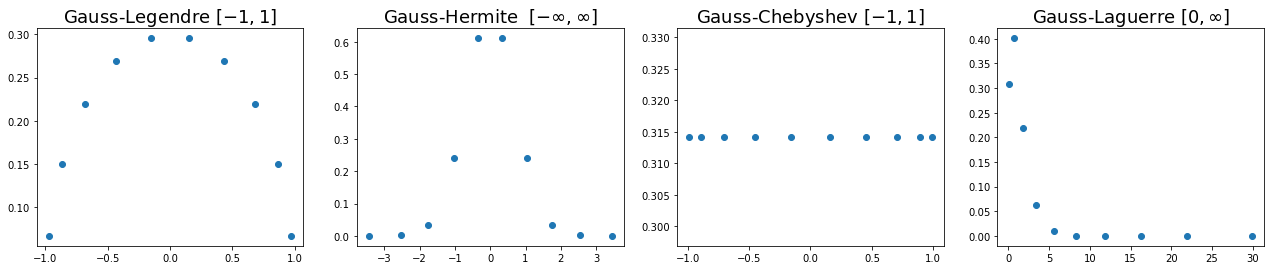

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n=10 # number of nodes
quad_methods= [np.polynomial.legendre.leggauss, np.polynomial.hermite.hermgauss,  
              np.polynomial.chebyshev.chebgauss, np.polynomial.laguerre.laggauss]
label= ["Gauss-Legendre $[-1,1]$", "Gauss-Hermite  $[-\infty,\infty]$",  
        "Gauss-Chebyshev $[-1,1]$", "Gauss-Laguerre $[0,\infty]$"]
fig, axs = plt.subplots(1, len(label), figsize=(22,4))
for i, method in enumerate(quad_methods): 
    x, w = quad_methods[i](n)
    axs[i].scatter(x, w)
    axs[i].set_title(label[i], fontsize=18)
plt.show()

### Gauss-Legendre Quadrature

- Domain $ [-1,1]$ .. or   $[a,b]$
- Weighting $ 1 $  


$$
\int_{-1}^1 f(x) dx = \sum_{i=1}^{n} \omega_i f(x_i) + \frac{2^{2n+1}(n!)^4}{(2n+1)!(2n)!}\frac{f^{(2n)}(\xi)}{(2n)!}
$$





- Nodes and weights come from Legendre polynomials 
- Good for computing integrals discounted sum of utility over finite horizons or expectation of random variables with finite support.
- Can be used if transforming expectation using inverse CDF (has domain [0,1]]
- The method of choice when no obvious weighting function can be used

In [15]:
# compute factor proportional to f(2n){\xi} appearing in error
import math
for n in range(20):
    z=(   (2**(2*n+1))*(math.factorial(n)**4) ) /(math.factorial(2*n+1) * math.factorial(2*n)**2)
    print('n=', n,  'z=', z)

n= 0 z= 2.0
n= 1 z= 0.3333333333333333
n= 2 z= 0.007407407407407408
n= 3 z= 6.349206349206349e-05
n= 4 z= 2.879458661771587e-07
n= 5 z= 8.079289174443286e-10
n= 6 z= 1.5408688826020251e-12
n= 7 z= 2.1274323822907644e-15
n= 8 z= 2.2247658899772702e-18
n= 9 z= 1.8232464951552934e-21
n= 10 z= 1.202510549502238e-24
n= 11 z= 6.5205639576676615e-28
n= 12 z= 2.958289886276444e-31
n= 13 z= 1.1394894376768524e-34
n= 14 z= 3.772965358184555e-38
n= 15 z= 1.085391438241117e-41
n= 16 z= 2.738035350149445e-45
n= 17 z= 6.106073849211671e-49
n= 18 z= 1.2124581278081642e-52
n= 19 z= 2.1573583963921932e-56


### Change of variable for Gauss-Legendre
A linear change of variable is necessary to apply Gauss-Legendre quadrature to general intervals $[a, b]$ rather than $[−1, 1]$ 

This change of interval from $[a, b]$ to $[−1, 1]$ can be done in the following way:

$$
{\displaystyle \int _{a}^{b}f(x)\,dx={\frac {b-a}{2}}\int _{-1}^{1}
f\left({\frac {(x+1)(b-a)}{2} +a }\right)\,dx .}
$$

Applying n point Gaussian quadrature ${\displaystyle (x ,w)}$ rule then results in the following approximation:

$$
\int _{a}^{b}f(x)\,dx
\approx {\frac {b-a}{2}}\sum _{i=1}^{n}w_{i}
f\left({\frac {(x_i+1)(b-a)}{2} +a }\right)\,dx 
$$

### Simple example
- Approximate $\int_{a}^b x^{m} dx$ using Gauss-Legendre
- How well does a $n$ point Gauss-Legendre approximate integrals of polynomials of degree $2n-1$?

In [5]:
from matplotlib import pyplot
def quad_leg(f, a=-1, b=1, n=10):
    x, w = np.polynomial.legendre.leggauss(n)
    Q=np.sum(w * (b-a)/2*f( (x+1)*(b-a)/2+a ) )
    return Q

# Example:
n=5; # number of quadrture nodes
m=9; # degree of polynomial
a=-1; b=2; # integration bounds
def f(x): return x**m   # function to integrate
def F(x): return 1/(m+1)*x**(m+1) # antiderivative of f
Q= quad_leg(f, a, b, n)
print('Exact solution, F(b)-F(a): ', F(b)-F(a))
print('Gauss-Legendre           : ', Q.round(16))


Exact solution, F(b)-F(a):  102.30000000000001
Gauss-Legendre           :  102.30000000000004


### Gauss-Legendre for expectations functions of random variables
- Can we make a change of variable so that we can compute the expectation functions of random variables with a general support?
$$
\mathbb{E}_{y} [f(y)] = \int_{\Omega} f(y)g(y)dy
$$
- Yes, if we know the inverse cdf for $y$, we can make the change of variable $y=G^{-1}(z)$ with $z = G(y) \in [0,1]$ 
- So $ dz = G'(y) dy = g(y) dy $, where $ G(y) $ and $ g(y) $ are cdf and pdf. 


$$
\mathbb{E}_{y} [f(y)] =\int_0^1 f\big(G^{-1}(z)\big) dz
$$

- Applying $n$ point Gauss-legendre quadrature for the interval $[a, b]=[0,1]$ with legendre nodes and weights $(x ,w)$  we obtain

$$
E[f(y)]={\frac {1}{2}}\int _{0}^{1}
f\left({\frac {G^{-1}(x)+1}{2}}\right)\,dx
\approx 
\sum _{i=1}^{n}{\frac {w_{i}}{2}}
f\left({\frac {G^{-1}(x_i)+1}{2}}\right)
$$


### Gauss-Hermite Quadrature

- Domain $ [-\infty,\infty] $  
- Weighting $ \exp(-x^2) $  


$$
\int_{-\infty}^\infty f(x) \exp(-x^2)dx = \sum_{i=1}^{n} \omega_i f(x_i) + \frac{n!\sqrt{\pi}}{2^n}\frac{f^{(2n)}(\xi)}{(2n)!}
$$

- Nodes and weights come from Hermite polynomials
- Good for computing expectation with Normal distribution 
$$
E[f(y)]
=(2\pi\sigma^2)^{-1/2}\int_{-\infty}^{\infty} f(y)e^{-(y-\mu)^2/(2\sigma^2)}dy
$$

since normal density is proportional to $\exp(-x^2)$ after after appropriate change of variable $x=(y-\mu)/(\sqrt{2}\sigma)$ so that $y=\sqrt{2}\sigma x+ \mu$ and $dy=\sqrt{2}\sigma dx$
$$
E[f(y)]
=\pi^{-1/2}\int_{-\infty}^{\infty} f(\sqrt{2}\sigma x+ \mu)e^{-x^2}dx\approx \pi^{-1/2}\sum_{i=1}^{n} \omega_i f(\sqrt{2}\sigma x_i+ \mu)
$$



In [6]:
# Quadrature rule for E[f(y)], where x~N(μ,σ)
def quad_herm_norm(f, μ=0, σ=1, n=10): 
    x, w = np.polynomial.hermite.hermgauss(n)
    y=μ+np.sqrt(2)*σ*x
    Q=np.sum(f(y)*w)/np.sqrt(np.pi)
    return Q

In [7]:
# Example: moments of normal varible,  x ~ N(μ,σ^2) and mean of log normal, y=exp(x)
import scipy.stats
μ=0; σ=1;    # parameters of log normal distribution
label=['E(exp(x))','E(x)', 'Var(x)', 'Skew(x)', 'Kurtosis(x)']
f=[lambda x:np.exp(x),lambda x:x, lambda x:x**2, lambda x:x**3, lambda x:x**4]; 
true_val=[np.exp(μ+ (σ**2)/2), μ, σ**2, 0, 3*σ**4]
Ginv = lambda x:  scipy.stats.norm.ppf(x, loc=μ, scale =σ)  # inverse cdf of normal
n=10 # number of quadrature nodes
for i, fi in enumerate(f):
    Q_leg=quad_leg(f= lambda x: fi(Ginv(x)),a=0,b=1,n=n)
    Q_herm=quad_herm_norm(fi, μ, σ, n) 
    print('%-15s%20.15f'   % (label[i], true_val[i]));
    print('%-15s%20.15f%15s%20.15f'   % ('Legendre: ', Q_leg , 'Error', (Q_leg- true_val[i])))
    print('%-15s%20.15f%15s%20.15f\n' % ('Hermite ', Q_herm, 'Error' ,(Q_herm- true_val[i])))

E(exp(x))         1.648721270700128
Legendre:         1.613759229099458          Error  -0.034962041600670
Hermite           1.648721270698232          Error  -0.000000000001896

E(x)              0.000000000000000
Legendre:         0.000000000000000          Error   0.000000000000000
Hermite          -0.000000000000000          Error  -0.000000000000000

Var(x)            1.000000000000000
Legendre:         0.978972996383541          Error  -0.021027003616459
Hermite           1.000000000000001          Error   0.000000000000001

Skew(x)           0.000000000000000
Legendre:         0.000000000000000          Error   0.000000000000000
Hermite           0.000000000000000          Error   0.000000000000000

Kurtosis(x)       3.000000000000000
Legendre:         2.622514249699726          Error  -0.377485750300274
Hermite           3.000000000000003          Error   0.000000000000003



### Let's compare $E[u(x; \eta)])$ for $\ln(x) \sim N(\mu, \sigma)$ for Legendre and  Hermite


In [8]:
# Example: mean utility of log normal varible, E(u(exp(y))), y ~ N(μ,σ^2)
import scipy.stats
μ=0; σ=1;    # parameters of log normal distribution

n=10   # number of nodes and weigthts
Ginv = lambda x:  scipy.stats.norm.ppf(x, loc=μ, scale =σ)  # inverse cdf of normal
for η in [0,1,2]:  # utility parameter (η=0: linear, η=1: log, η>1: more risk averse than log)
    Q_leg=quad_leg(lambda x: u(np.exp(Ginv(x)), η),a=0,b=1,n=n)
    Q_herm=quad_herm_norm(lambda x: u(np.exp(x), η), μ, σ, n) 
    print('%-15s%20.15f'   % ('Gauss-Legendre approx of E[u(y,η=%d)]', Q_leg) % η)
    print('%-15s%20.15f\n'   % ('Gauss-Hermite  approx of E[u(y,η=%d)]', Q_herm) % η)

Gauss-Legendre approx of E[u(y,η=0)]   0.613759229099458
Gauss-Hermite  approx of E[u(y,η=0)]   0.648721270698232

Gauss-Legendre approx of E[u(y,η=1)]   0.000000000000000
Gauss-Hermite  approx of E[u(y,η=1)]  -0.000000000000000

Gauss-Legendre approx of E[u(y,η=2)]  -0.613759229099458
Gauss-Hermite  approx of E[u(y,η=2)]  -0.648721270698232



### Example: Consumption-savings problems
📖  Deaton, Angus (1991): "Saving and Liquidity constraints" *Econometrica*, 1221-1248. ([link to paper](https://www.princeton.edu/~deaton/downloads/Saving_and_Liquidity_Constraints.pdf))

📖 Phelps, E. S. (1962). The accumulation of risky capital: A sequential utility analysis. *Econometrica*, 729-743. ([link to paper](https://www.jstor.org/stable/1909322f))

- Discount factor $ \beta=1+\delta$, where $\delta$ is the subjective discount rate 
- Time separable utility of consumption $v(c_t)$ of consumption during the period $ t $, $c_t \ge 0$
- Evolution of assets, $A_{t+1}=R_t(A_t-c_t+y_t)$
- Gross return on savings $ R_t $, *can be stochastic* and revealed after consumption decision is made 
- Constant income $ y_t \ge 0 $, *can be stochastic*.
- Single state "Cash on hand" in the beginning of the period  $t$, $x_t=A_t+y_t$
- Implied state transition is $x_{t+1}=R_t(x_t-c_t) + y_{t+1}$
- A constraints on borrowing $A_t=x_t-c_t \ge 0$ and consumption $c_t \ge 0$ implies that $\rightarrow c_t \in [0, x_t]$  
 

- Special cases
    - When $R=1$ and $y=0 $ we have the (deterministic) cake eating problem.
    - When $R=1$ and $y $ has discrete support we have the stochastic cake eating problem.
    - When y is deterministic we have Phelps's model (ECMA, 1962)
    - When R is deterministic we have Deaton's model (ECMA, 1991)

### States, decisions and preferences, and transitions in the MDP framework
- Recall our the general framework for the finite horizon problem
$$
V_t(W_t)=\max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)  \big]
$$

- **States:**  Single state, cash on hand $s_t = x_t$. 
- **Choices:**  Single choice variable $d_t=c_t$ and state dependent choice set $c_t\in D(x_t)=[0,x_t]$
- **Payoffs:** Utility flow only depend on current cake consumption, $u_t(s_t, d_t)=u_t(x_t, c_t)=u(c_t)$
- **State transition** $p(s_{t+1}|s_t, d_t) =p(x_{t+1}|x_t, c_t)$ depends on distribution of $y_t$ and $R_t$
    - Transition equation $x_{t+1}=R_t(x_t-c_t) + y_{t+1}$
    - Like Deaton we assume $R_t=(1+r)$ to be fixed
    - We assume $y_t$ has density $g(y_t)$ and is exogenous (does not depend on $x_t$ and $c_t$)

### Bellman equation for the stochastic problem 
- Given our specification of states, choices, preferences and beleifs on the previous slide, the Bellman equation for our stochastic cake eating model becomes

\begin{eqnarray}
V_t(x_t)&=&\max_{c_t \in [0,x_t]} \big[u(c_t) + \beta \int V_{t+1}(x_{t+1})p(dx_{t+1}|x_t, c_t)  \big] \\
&=&\max_{c_t \in [0,x_t]} \big[u(c_t) + \beta \int V_{t+1}(R_t(x_t-c_t) + y_{t+1})g(y_{t+1})dy_{t+1}  \big]
\end{eqnarray}

- For the infinite horizon problem the Bellman equation is defined by the Bellman operator $\Gamma$
$$
\Gamma(V)(x)=\max_{c_t \in [0,x_t]} \big[u(c_t) + \beta \int V(\underbrace{R(x-c) + y'}_{x'(y')})g(y')dy'  \big]
$$
and the value function is the unique fixed point $V =\Gamma(V)$


- We let stochastic income $y_t$ be log normal with parameters $\mu$ and $\sigma$, i.e. $\ln(y_t)\sim N(\mu, \sigma^2)$ 
- Inverse CDF:  $G^{-1}(p)=\exp(\mu + \sigma\Phi^{-1}(p))$
- Income has positive support $y_t > 0 $ and $ \mathbb{E}(y_t) = \exp(\mu + \sigma^2/2))$  
- For backward compatibility with cake eating problem we add $ y=0 $ special case



### Solving stochastic consumption-savings model

VFI solution method will still work

1. Discretize state space and set the initial values for $ V_0(x) $ at state grid  
1. Evaluate Bellman operator to compute $ V_n(x) $ from $ V_{n-1}(x) $, and simultaneously compute the optimal decisions (policy) $ c_n(x) $ at state grid  
1. Check for convergence in value function space, repeat the last step if not yet converged


**But now need to compute the expectation when calculating the maximand in the Bellman equation**

Quadrature!

### Details on Gauss-Legendre quadrature calculation
- We have 
$$
\mathbb{E}_{x'|x,c}[V(x')]= \int_{-\infty}^{\infty}  V\left(R(x-c) + y'\right)g(y')dy' =\int_0^1 V\left(R(x-c) + G^{-1}(z')\right) dz'
\\ =\int_0^1 V\left(R(x-c) + \exp(\mu+ \sigma\Phi^{-1}(z')\right) dz' $$
where we have used the inverse CDF of $G^{-1}(z)= \exp(\mu+ \sigma\Phi^{-1}(z))$ to map uniform random variables $z$ in to log normal variables $y=G^{-1}(z)$

- This integral can easily solve using Gauss-Legendre for the interval $[a,b]=[0,1]$ 
$$
\mathbb{E}_{x'|x,c}[V(x')]
\approx \sum_i \frac{w_i}{2} V\left(R(x-c) + \exp\left(\mu+ \sigma\Phi^{-1}\left((q_i+1)/2\right)\right)\right)
$$
where $\{q_i,w_i\}$ are Gauss-Legendre quadrature notes and weights for the interval $[-1,1]$

- Gauss-Hermite would be more effective in this case. 
    - This is a good exercise for you!
    - Hint: Make the change of variable $y=\exp(z)$ so that you need to take the integral over a normally distributed variable, $z$

### Model class: deaton

In [9]:
import numpy as np
from scipy import interpolate # Interpolation routines
class deaton():
    '''Class to implement deaton's model with log-normally distrubuted income shocks'''
    def __init__(self,β=.9, R=1, μ=0, σ=1, η=1, xbar=[0, 10], n_x=50, n_c=100, n_y=10):
        '''Initializer'''
        # structural parameters
        self.β  = β       # Discount factor
        self.R  = R      # Returns on savings
        self.μ  = μ       # Location parameter for income shock, y (if y is log normal, ln(y) ~ N(μ, σ^2))  
        self.σ  = σ       # Scale parameter for income shock, y
        self.η  = η       # CRRA utility parameter, (η=0: linear, η=1: log, η>1: more risk averse than log
        
        # spapces
        self.xbar = xbar  # Upper and lower bound on cash on hand
        self.n_x = n_x    # Number of grid points for cash on hand
        self.n_c = n_c    # Number of grid points for choice grid
        self.n_y = n_y    # Number of quadrature points for income

        # quadrture grids for y (adjusted weights and nodes)
        q, w = np.polynomial.legendre.leggauss(n_y) # legendre quadrture nodes and weights on [-1,1]
        Ginv = lambda z:  np.exp(scipy.stats.norm.ppf(z, loc=self.μ, scale =self.σ))  # inverse cdf of log-normal
        self.weights=w/2; # change of varibale to adjust to [0,1] interval
        self.y = Ginv((q+1)/2) # use change of varibale to adjust nodes to [0,1] interval and use Ginv to obntain y
        
        # grids for x and c (adjusted to satisfy constraints)
        self.xbar[0] = np.maximum(np.finfo(float).eps, self.xbar[0]);  # truncate lower bound at smallest positive float number
        self.x = np.linspace(self.xbar[0],self.xbar[1],n_x).reshape((n_x,1)) # grid for state space (n_w x1 array)
        self.c = np.empty((n_x,n_c)) # initilize grid for choices for each staty point 
        for i in range(n_x): 
            # make grid between that satisfies the constraint, c\in[0,x[i]] 
            self.c[i,:] = np.linspace(self.xbar[0],self.x[i],n_c).reshape((1,n_c)) 
    
    def u(self,c): # utility function
        '''Utility function, crra'''
        if self.η==1:
            return np.log(c)
        elif self.η>=0:
            return (c**(1-self.η) -1)/(1-self.η)
    
    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on state grid'''
        interp = interpolate.interp1d(self.x[:,0],V0,  bounds_error=False,fill_value='extrapolate')
        EV=0 
        for i, y_i in enumerate(self.y): # compte expectation wrt to shocks to future state
            x1=self.R*(self.x-self.c) + y_i # next period x, conditional of w and c, shock, nW x nC
            EV+=self.weights[i]*interp(x1);
        matV1 = self.u(self.c) + self.β * EV        
        i_max= np.argmax(matV1,axis=1); # (column) idex of optimal choices
        V1 = matV1[np.arange(self.n_x),i_max]  
        c1 = self.c[np.arange(self.n_x),i_max] 
        return V1, c1


### Model class: Solver (VFI and backward induction)

In [10]:
from scipy import interpolate # Interpolation routines
from time import process_time
class dpsolver():
    '''Class to implement deaton's model with log-normally distrubuted income shocks'''
    def vfi_T(model, T=100, callback=None):
        '''Solves the model using backward induction (VFI with maxiter =T'''
        tic = process_time() # Start the stopwatch / counter
        V=np.zeros((model.n_x, T+1)) # on first iteration assume consuming everything
        c=np.zeros((model.n_x, T+1)) # on first iteration assume consuming everything
        for t in range(T-1, 0, -1):
            V[:,t-1],c[:,t-1]=model.bellman(V[:,t])
            if callback: callback(t,model.x,V, c) # callback for making plots and plotting iterations
        else:  # when i went up to maxiter
            toc = process_time() # Stop the stopwatch / counter
            print(model, 'solved by backward induction using',round(toc-tic, 5), 'seconds')
        return V,c
    
    def vfi(model, maxiter=100, tol=1e-6,callback=None):
        '''Solves the model using VFI (successive approximations)'''
        tic = process_time() # Start the stopwatch / counter
        V0=np.zeros(model.n_x) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=model.bellman(V0)
            if callback: callback(iter,model.x,V1, c1, V0) # callback for making plots
            if np.max(abs(V1-V0)) < tol:
                toc = process_time() # Stop the stopwatch / counter
                print(model, 'solved by VFI in', iter, 'iterations using',round(toc-tic, 5), 'seconds')
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1
    
    def iterinfo(iter,model,V1,V0, c=None):
        print('iter=', iter, '||V1-V0||', np.max(abs(V1-V0)))
    


### Routine for plotting value and policy functions

In [11]:
# function for plotting
import matplotlib.pyplot as plt
def v_c_plot(x, V, c):
    '''Illustrate solution'''
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
    ax1.grid(b=True, which='both', color='0.65', linestyle='-')
    ax2.grid(b=True, which='both', color='0.65', linestyle='-')
    ax1.set_title('Value function')
    ax2.set_title('Policy function')
    ax1.set_xlabel('Cash on hand, x')
    ax2.set_xlabel('Cash on hand, x')
    ax1.set_ylabel('Value function')
    ax2.set_ylabel('Policy function')
    if len(V.shape)==1: 
        V=V[:,np.newaxis]
        c=c[:,np.newaxis]
    for i in range(V.shape[1]):
        ax1.plot(x[1:],V[1:,i],color='k',alpha=0.25)
        ax2.plot(x[1:],c[1:,i],color='k',alpha=0.25)
    # add solutions
    ax1.plot(x[1:],V[1:,0],color='r',linewidth=2.5)
    ax2.plot(x[1:],c[1:,0],color='r',linewidth=2.5)
    plt.show()

### Let's solve Deaton's model: Counter clockwise "concavity-cation" of the consumption function

<__main__.deaton object at 0x7f81a0d6f100> solved by backward induction using 0.71745 seconds


/var/folders/gp/d0906mc533164875x1l8gf600000gn/T/ipykernel_14961/3821821047.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='both', color='0.65', linestyle='-')
/var/folders/gp/d0906mc533164875x1l8gf600000gn/T/ipykernel_14961/3821821047.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=True, which='both', color='0.65', linestyle='-')


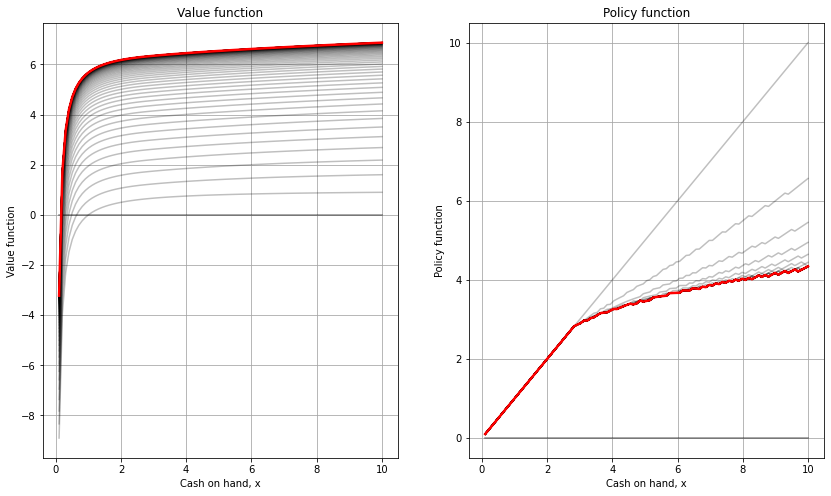

In [12]:
# default inputs  for deaton: β=.9, R=1, μ=0, σ=1, η=1, xbar=[0, 10], n_x=50, n_c=100, n_y=10
m1=deaton(β=.9, R=1.0, μ=1, σ=.1, η=2, xbar=[0, 10], n_x=100, n_c=100, n_y=10) 

# V, c = dpsolver.vfi(m1, maxiter=1000, callback=dpsolver.iterinfo)
V, c = dpsolver.vfi_T(m1, T=100);
v_c_plot(m1.x, V, c)


### Let's simulate Deaton's model: Precautionary savings allows consumer to smooth out income shocks

<__main__.deaton object at 0x7f81a1252490> solved by backward induction using 5.002 seconds


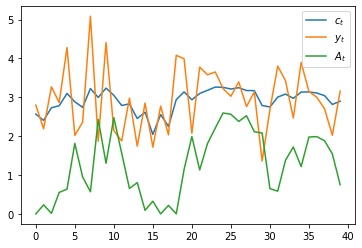

In [13]:
def simulate(model,Tsim=99, T=100, A0=0):
    V, c = dpsolver.vfi_T(model, T);  
    x=model.x; 
    c_t = np.empty(Tsim)
    x_t = np.empty(Tsim)
    y_t = np.exp(np.random.normal(loc=model.μ, scale=model.σ, size=Tsim))
    x_t[0]=A0+y_t[0];     
    for t in range(Tsim):
        c_interp = interpolate.interp1d(x[:,0],c[:,t],  bounds_error=False,fill_value='extrapolate')
        c_t[t] = c_interp(x_t[t])  # Use the solution 
        if t<Tsim-1:
            x_t[t+1] = model.R*(x_t[t]-c_t[t]) + y_t[t+1]
    return y_t, x_t, c_t

# Define model
m1=deaton(β=.95, R=1.0, μ=1, σ=.3, η=2, xbar=[0, 20], n_x=100, n_c=150, n_y=10) 
# Solve and simulate
y_t, x_t, c_t = simulate(m1, Tsim=40, T=501, A0=0)
plt.plot(c_t, label="$c_t$")       # Consumption
plt.plot(y_t, label="$y_t$")       # Income
plt.plot(x_t-y_t, label="$A_t$")   # Assets
plt.legend()
plt.show()    

### Some lessons from this lecture
1. Need to solve the integral to obtain the expected future value conditional current states and choices
1. Quadrature methods
    - **Gauss Legendre**: effective for computing expectations of functions of random variables where we cannot exploit structure from density but know the inverse cdf
    - **Gauss Hermite**: very effective for computing expectations of functions of normally distributed random variables
    - Gauss quadrature with $n$ nodes approximate integrals of functions that can be approximated by a $2n-1$ polybnomial


1. Monte Carlo
    - Noisy and not as effective as quadrture in in 1d
    - But as we will learn next time Monte Carlo breaks the curse of dimensionality for multidimensional integration 


3. Consumption and savings with stochastic income (Deatons model)
    - Used Legendre quadrature to compute expectations of value function wrt to log-normal distribution of income shocks 
    - Risk averse consumers (with high $\eta$) who are subject to income uncertainty, save a buffer against bad income shocks. 
    - This gives consumer smoother consumption profiles 
    - We call this the precautionary savings motive. 